In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import platform
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기

In [2]:
df_demo = pd.read_csv('data/LPOINT_BIG_COMP_01_DEMO.csv') # 고객정보
df_pdde = pd.read_csv('data/LPOINT_BIG_COMP_02_PDDE.csv', parse_dates = [6]) # 구매정보
df_copu = pd.read_csv('data/LPOINT_BIG_COMP_03_COP_U.csv', parse_dates = [5, 6]) # 유통사 이용 정보 (B01 ~ E00)
df_pd = pd.read_csv('data/LPOINT_BIG_COMP_04_PD_CLAC.csv') # 상품 정보

df_pdde['weekday'] = df_pdde['de_dt'].dt.weekday

C:\Users\Eugene\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 데이터 확인

In [85]:
DF = pd.merge(df_pdde, df_demo, on='cust')
DF = pd.merge(DF, df_pd, on='pd_c')
DF.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,weekday,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,4,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
1,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,4,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,4,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,4,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의
4,M646853852,A01269523084,1,A01,A010025,PD0290,2021-07-16,20,20000.0,1,4,여성,40대,Z13,남성티셔츠,남성의류,남성의류상의


In [94]:
print('DF.info():')
print(DF.info(), end='\n\n')
print('요약통계:\n', DF.describe())

DF.info():
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4381743 entries, 0 to 4381742
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   cust          object        
 1   rct_no        object        
 2   chnl_dv       int64         
 3   cop_c         object        
 4   br_c          object        
 5   pd_c          object        
 6   de_dt         datetime64[ns]
 7   de_hr         int64         
 8   buy_am        float64       
 9   buy_ct        int64         
 10  weekday       int64         
 11  ma_fem_dv     object        
 12  ages          object        
 13  zon_hlv       object        
 14  pd_nm         object        
 15  clac_hlv_nm   object        
 16  clac_mcls_nm  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(11)
memory usage: 601.7+ MB
None

요약통계:
             chnl_dv         de_hr        buy_am        buy_ct       weekday
count  4.381743e+06  4.381743e+06  4.381743e+06  4.381743

In [97]:
print('Shape:', DF.shape, end = '\n\n')
print('Index:', DF.index, end = '\n\n')
print('Columns:', DF.columns)

Shape: (4381743, 17)

Index: Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            4381733, 4381734, 4381735, 4381736, 4381737, 4381738, 4381739,
            4381740, 4381741, 4381742],
           dtype='int64', length=4381743)

Columns: Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'weekday', 'ma_fem_dv', 'ages', 'zon_hlv', 'pd_nm',
       'clac_hlv_nm', 'clac_mcls_nm'],
      dtype='object')


## 결측치

In [86]:
DF.isna().sum()

cust                 0
rct_no               0
chnl_dv              0
cop_c                0
br_c            428501
pd_c                 0
de_dt                0
de_hr                0
buy_am               0
buy_ct               0
weekday              0
ma_fem_dv            0
ages                 0
zon_hlv              0
pd_nm                0
clac_hlv_nm          0
clac_mcls_nm         0
dtype: int64

In [77]:
DF.loc[DF['br_c'].isna(), 'chnl_dv'].unique()

array([2], dtype=int64)

온라인 구매라서 지점정보가 없음

In [87]:
# 온라인 구매 데이터의 지점구분 컬럼을 'A0x0000'으로 채움
for i in range(1, 7):
    DF.loc[(DF['cop_c'] == f'A0{i}')&(DF['br_c'].isna()), 'br_c'] = f'A0{i}0000'

In [88]:
DF.isna().sum()

cust            0
rct_no          0
chnl_dv         0
cop_c           0
br_c            0
pd_c            0
de_dt           0
de_hr           0
buy_am          0
buy_ct          0
weekday         0
ma_fem_dv       0
ages            0
zon_hlv         0
pd_nm           0
clac_hlv_nm     0
clac_mcls_nm    0
dtype: int64

# 시각화

In [ ]:
DF = DF.loc[((DF['ages'] == '20대')|(DF['ages'] == '30대'))&((DF['cop_c'] != 'A01')&(DF['cop_c'] != 'A05'))]

## 시계열 변화

In [4]:
# 온/오프라인
df_onoff = DF.groupby(['de_dt', 'chnl_dv'])['rct_no'].unique().to_frame(name='orders')
df_onoff['order_n'] = df_onoff['orders'].apply(lambda x: len(x))
df_onoff = df_onoff.reset_index()

df_onoff_am = DF.groupby(['de_dt', 'chnl_dv'])['buy_am'].sum().to_frame(name='total_am').reset_index()

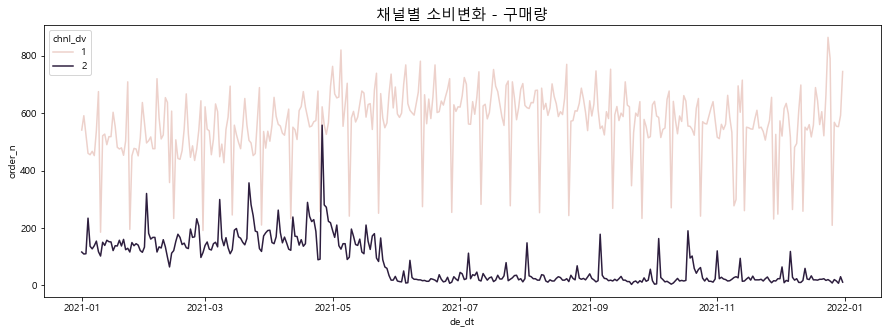

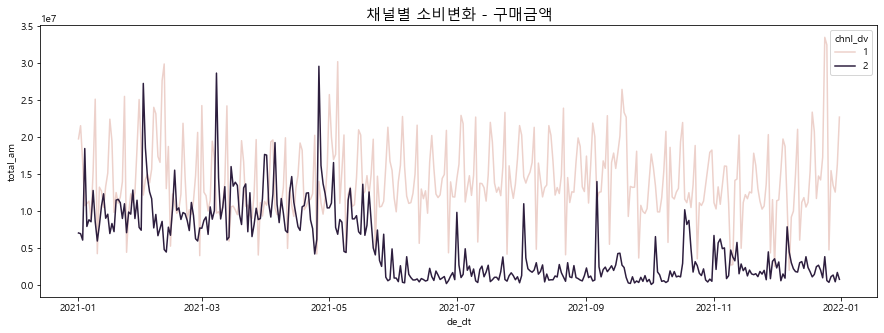

In [5]:
plt.figure(figsize = (15, 5))
sns.lineplot(data = df_onoff, x = 'de_dt', y = 'order_n', hue = 'chnl_dv')
plt.title('채널별 소비변화 - 구매량', fontsize=15)
plt.show()

plt.figure(figsize = (15, 5))
sns.lineplot(data = df_onoff_am, x = 'de_dt', y = 'total_am', hue = 'chnl_dv')
plt.title('채널별 소비변화 - 구매금액', fontsize=15)
plt.show()

In [6]:
# 유통사별
df_copc = DF.groupby(['de_dt', 'cop_c', 'chnl_dv'])['rct_no'].unique().to_frame(name='orders')
df_copc['order_n'] = df_copc['orders'].apply(lambda x: len(x))
df_copc['amount'] = DF.groupby(['de_dt', 'cop_c', 'chnl_dv'])['buy_am'].sum()
#df_copc['Mean_Amount'] = df_copc['amount']/df_copc['order_n']
df_copc = df_copc.reset_index()

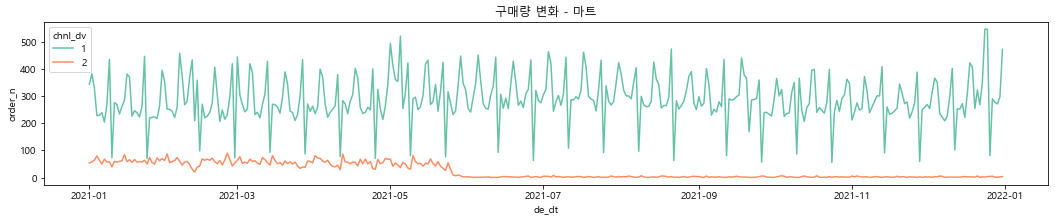

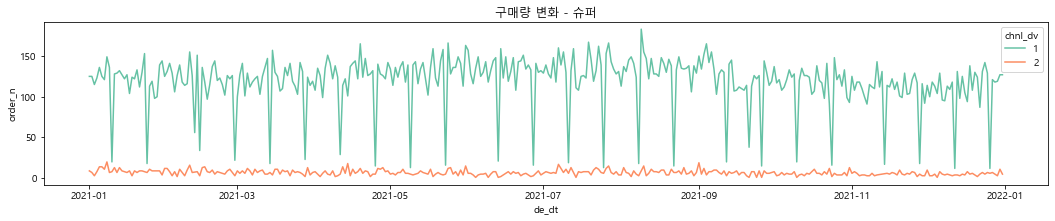

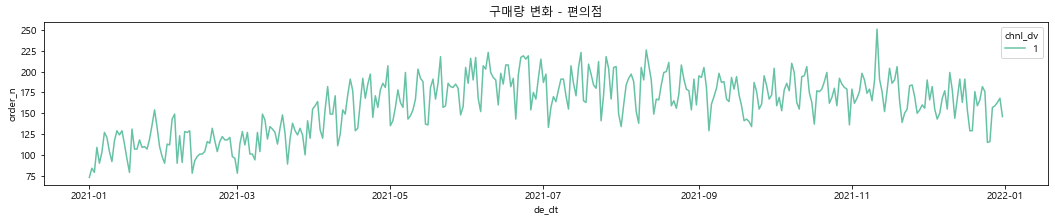

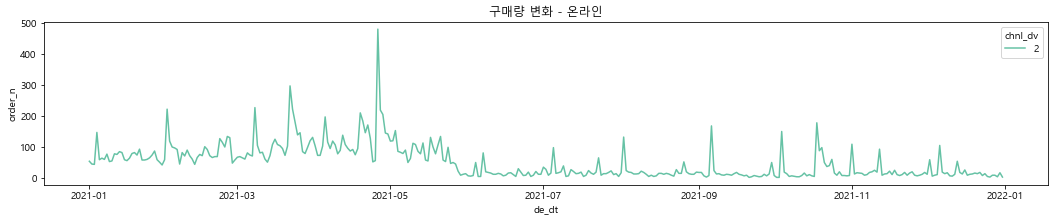

In [7]:
cops = ['마트', '슈퍼', '편의점', '온라인']

for i, v in enumerate([2, 3, 4, 6]):
    plt.figure(figsize = (18, 3))
    sns.lineplot(data = df_copc.loc[df_copc['cop_c'] == f'A0{v}'], x = 'de_dt', y = 'order_n', hue = 'chnl_dv', palette = 'Set2')
    plt.title('구매량 변화 - '+cops[i])
    plt.show()

- 온라인 구매량이 5월 말부터 감소했는데 기사를 찾아보니 이때부터 백신 접종 시작이었음
- 특정 유통사에서 감소가 있었나 확있했더니 전반적으로 같은 시기에 온라인 감소/오프라인 증가 양상을 보임
- 따라서 백신 때문에 온라인 소비 자체가 감소한 것으로 보임 > __이벤트로 인한 소비 변화가 있어서 온오프라인 구분은 의미 없을 듯__

### 식품/생활/여가별 변화 확인

In [8]:
# 상품분류
foods = ['건강식품', '건해산물', '과일', '과자', '냉동식품', '냉장식품', '대용식', '병통조림', '수산물', '주류', '채소'
         , '축산물', '커피/차', '양곡', '유제품', '음료', '조리식품', '조미료']

living = ['가구', '건강용품', '계절가전', '공구/안전용품', '기타(비상품)', '냉장/세탁가전', '담배', '문구/사무용품', '생활/렌탈서비스',
         '생활/주방가전', '세제/위생', '속옷/양말/홈웨어', '식기/조리기구', '유아동의류', '유아식품', '인테리어/조명', '자동차용품',
         '주방잡화', '청소/세탁/욕실용품', '출산/육아용품', '침구/수예', '퍼스널케어']

leisure = ['구기/필드스포츠',  '남성의류', '모바일', '상품권', '서적/음반/악기', '스포츠패션', '시즌스포츠', '아웃도어/레저', '여성의류'
           , '여행/레저서비스', '영상/음향가전', '완구', '원예/애완', '컴퓨터', '테넌트/음식점', '패션잡화', '헬스/피트니스', '화장품/뷰티케어']

In [9]:
DF['Product'] = 'Living'
DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in foods), 'Product'] = 'Food'
DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in leisure), 'Product'] = 'Leisure'

In [10]:
df_pt = DF.loc[DF['chnl_dv'] == 1].groupby(['de_dt', 'cop_c', 'Product'])['rct_no'].unique().to_frame(name='orders')
df_pt['order_n'] = df_pt['orders'].apply(lambda x: len(x))
df_pt = df_pt.reset_index()

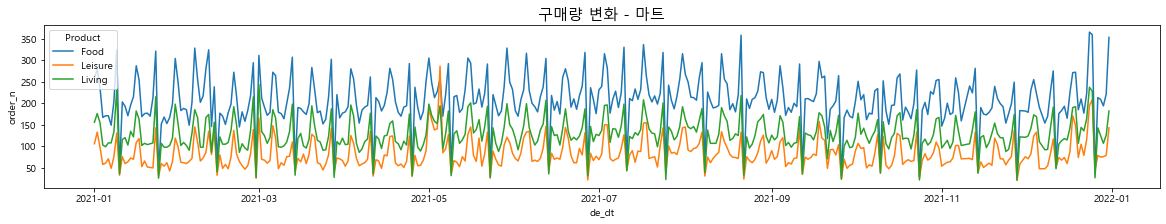

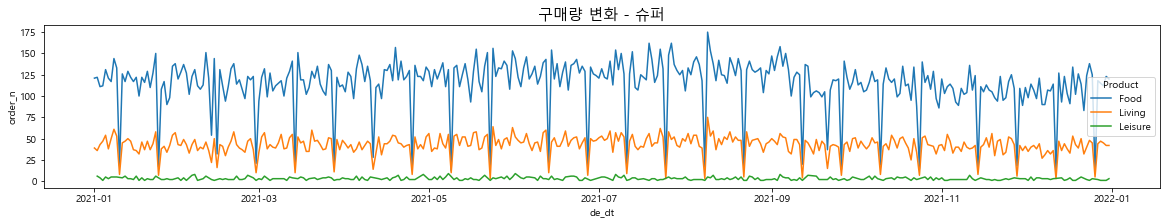

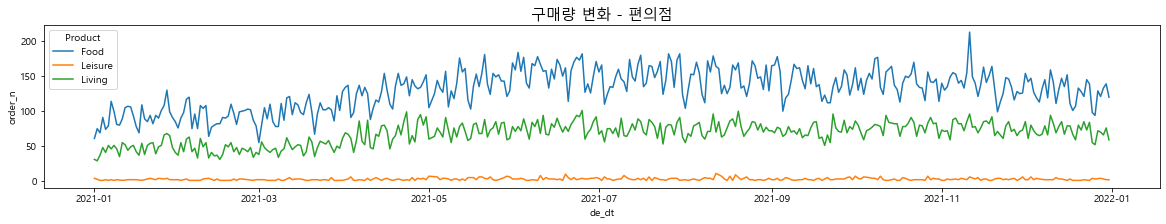

In [11]:
for i, v in enumerate([2, 3, 4]):
    plt.figure(figsize = (20, 3))
    sns.lineplot(data = df_pt.loc[df_pt['cop_c'] == f'A0{v}'], x = 'de_dt', y = 'order_n', hue = 'Product')
    plt.title('구매량 변화 - '+cops[i], fontsize = 15)
    plt.show()

- 임의로 나눈 식품/생활/여가 분류로 확인해봤는데 유의미한 인사이트는 찾지 못 함

## 요일/시간대

In [105]:
DF = pd.merge(df_pdde, df_demo, on='cust')
DF = pd.merge(DF, df_pd, on='pd_c')
DF = DF.loc[(DF['ages'] == '20대')|(DF['ages'] == '30대')]
DF_foods = DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in foods)]

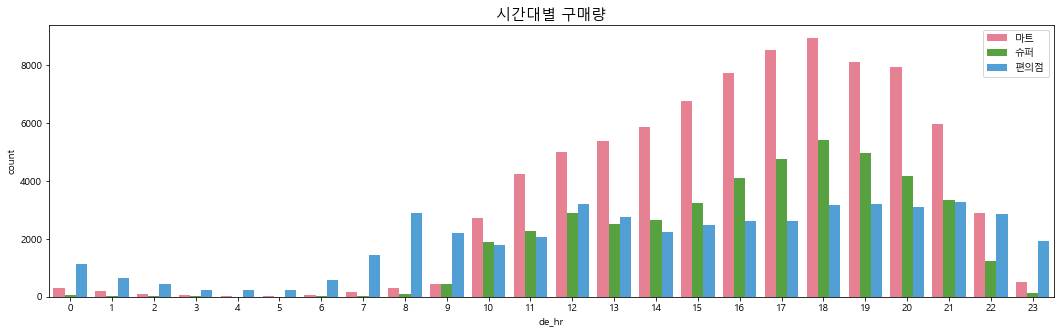

In [113]:
wd02 = DF_foods.loc[(DF_foods['cop_c'] == 'A02')|(DF_foods['cop_c'] == 'A03')|(DF_foods['cop_c'] == 'A04'), ['rct_no', 'weekday', 'cop_c', 'de_hr']].drop_duplicates()

plt.figure(figsize=(18, 5))
sns.countplot(data = wd02, x = 'de_hr', hue = 'cop_c', palette = 'husl', hue_order = ['A02', 'A03', 'A04'])
plt.legend(['마트', '슈퍼', '편의점'])
plt.title('시간대별 구매량', fontsize=15)
plt.show()

- 마트랑 편의점 이용 시간대 분포가 달라서 시간 데이터를 이용하려면 유통사를 구분해서 사용해야할 것 같음

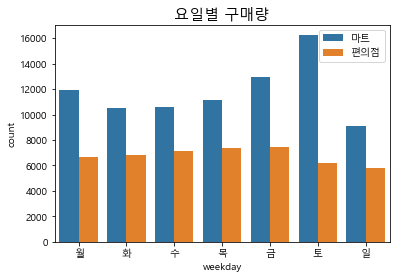

In [115]:
wd02 = DF_foods.loc[(DF_foods['cop_c'] == 'A02')|(DF_foods['cop_c'] == 'A04'), ['rct_no', 'weekday', 'cop_c', 'de_hr']].drop_duplicates()
sns.countplot(data = wd02, x = 'weekday', hue = 'cop_c')
plt.xticks([i for i in range(7)], ['월', '화', '수', '목', '금', '토', '일'])
plt.legend(['마트', '편의점'])
plt.title('요일별 구매량', fontsize=15)
plt.show()

Text(0, 0.5, '시간대')

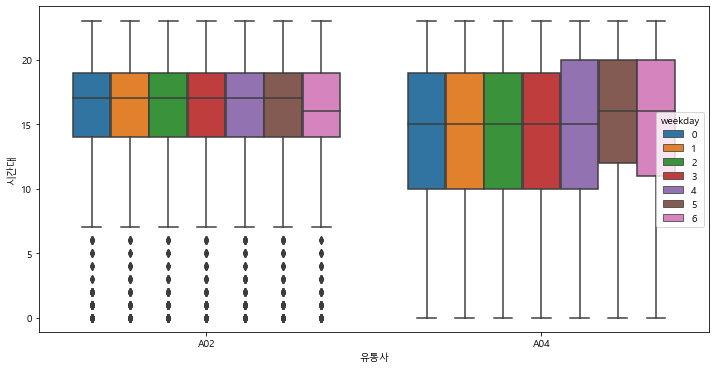

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="cop_c", y="de_hr", hue="weekday", data=wd02)
plt.xlabel('유통사')
plt.ylabel('시간대')

- 요일별 분포에서 주말과 평일의 차이가 있어서 요일 정보를 이용하려면 평일/주말로 나누는게 좋을 듯

## 식품 중분류별 구매량

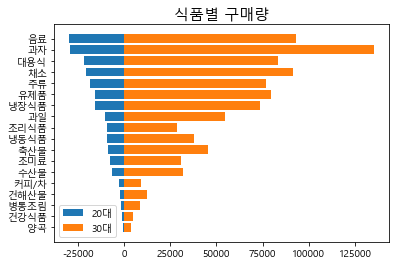

In [160]:
food_dv_age = DF_foods.groupby(['clac_hlv_nm','ages'])['buy_ct'].sum().unstack()
food_dv_age = food_dv_age.fillna(0)
food_dv_age = food_dv_age.sort_values(by='20대')
plt.barh(food_dv_age.index, -(food_dv_age['20대']), label = '20대')
plt.barh(food_dv_age.index, food_dv_age['30대'], label = '30대')
plt.legend()
plt.title('식품별 구매량', fontsize = 15)
plt.show()

- 20대에 비해 30대 과자 구매량이 눈에 띄게 높음 (과자 한 개 당)

Text(0.5, 1.0, '식품 중분류 구매 횟수 상관관계')

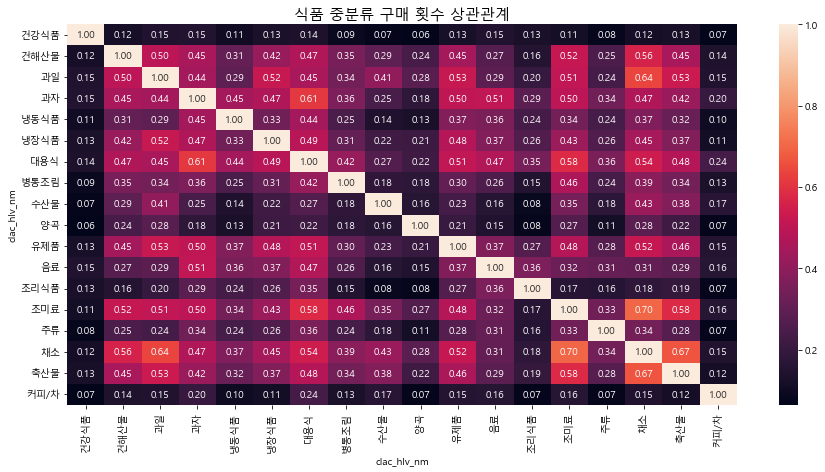

In [121]:
food_dv = DF_foods.groupby(['cust', 'clac_hlv_nm'])['buy_ct'].sum().unstack()
food_dv = food_dv.fillna(0)

plt.figure(figsize=(15, 7))
sns.heatmap(food_dv.corr(), annot = True, fmt='.2f')
plt.title('식품 중분류 구매 횟수 상관관계', fontsize=15)

- 조미료를 많이 구매 한 사람은 채소를 많이 구매한다는 상관관계가 있고
- 조리식품 구매 횟수는 수산물, 양곡 구매 횟수는 전혀 관련이 없고, 대용식 구매 횟수와는 관련이 있음
- __상관이 있는 품목들을 하나의 카테고리로 분류__할 수 있을 것 같음 (예를 들어, 조리식품과 대용식을 간편식품으로)

### 주성분 분석

- 식품 중분류를 카테고리별로 직접 나누지 않고 차원축소를 이용해 보았음.
- or 특정 선호가 있을법한 상품 생각해보기

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [125]:
X = food_dv.values
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_scaled)
principalDF = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(10)])

In [126]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(principalDF.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,6.585966,0.365845,0.365845
pca2,1.376788,0.076479,0.442324
pca3,1.001723,0.055645,0.497969
pca4,0.966809,0.053705,0.551674
pca5,0.883163,0.049059,0.600733
pca6,0.851924,0.047324,0.648057
pca7,0.819560,0.045526,0.693582
pca8,0.743737,0.041314,0.734896
pca9,0.696194,0.038673,0.773569
pca10,0.629720,0.034980,0.808550


In [127]:
DFpca = pd.concat([food_dv.reset_index()[['cust']], principalDF.iloc[:, :9]], axis=1)
DFpca.head()

,cust,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,M000136117,-1.487296,-0.221752,-0.051990,-0.054742,0.325688,0.217847,-0.023426,0.102661,-0.152914
1,M000494848,3.999770,4.551228,11.746023,-15.528056,-6.679488,6.578643,-1.787102,-0.611141,-0.382946
2,M000504230,0.646033,1.764710,-1.001492,0.589020,-1.123020,1.009407,3.468676,-0.321827,1.861603
3,M000557840,1.625062,0.669729,-1.220407,0.908974,-1.181119,1.433814,1.603227,-1.330832,0.498945
4,M000871427,-1.054573,-0.070543,0.148376,0.337244,-0.072340,0.171360,0.080852,-0.206441,0.250326


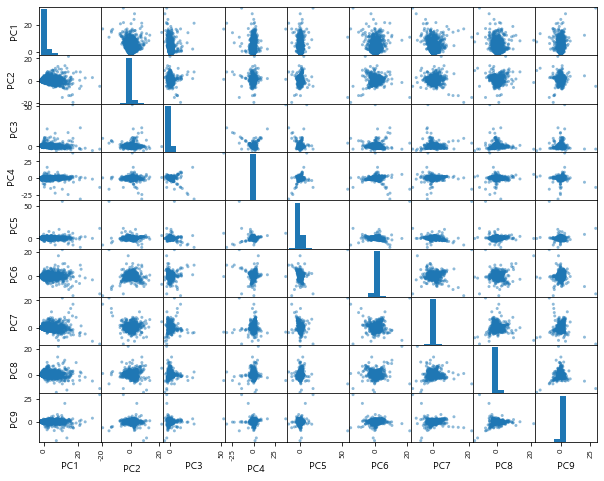

In [128]:
from pandas.plotting import scatter_matrix
scatter_matrix(DFpca.iloc[:, 1:], figsize = (10, 8))
plt.show()

- 직관적인 해석은 불가능하지만 18가지의 정보(컬럼)를 9개로 줄이면서 80% 정도로 데이터를 표현할 수 있음

## 소비자 유형 특징 상품

- 외식 정보(테넌트/음식점 이용금액 + 롯데리아 이용금액) 컬럼 생성
- 신경마케팅 유형별 특성값을 각 유형이 많이 구매하는 상품으로 생성

In [104]:
tenant = ['커피/음료', '양식', '베이커리', '분식', '한식', '푸드코트컨세션', '푸드코트한식', '푸드코트중식',
       '푸드코트일식', '일식', '디저트', '동남아식', '푸드코트양식', '중식', '푸드코트분식', '뷔페', '패스트푸드']

ani = ['원예/애완'] # 조화론자
car = ['자동차용품'] # 실행가 성향
fashion = ['여성의류', '남성의류', '패션잡화'] # 쾌락주의자
sports = ['구기/필드스포츠', '스포츠패션', '시즌스포츠', '아웃도어/레저', '헬스/피트니스'] # 모험가 성향

In [106]:
DF['gr'] = '기타'
DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in ani), 'gr'] = '원예/애완'
DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in car), 'gr'] = '자동차용품'
DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in fashion), 'gr'] = '패션용품'
DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in sports), 'gr'] = '스포츠용품'
DF.loc[DF['pd_nm'].apply(lambda x: x in tenant), 'gr'] = '음식점'

In [107]:
DFgr = DF.groupby(['cust', 'gr'])['buy_am'].sum().unstack()
DFgr = DFgr.fillna(0)
DFgr = DFgr.iloc[:, 1:]

In [108]:
df_store = pd.merge(DFgr, df_copu.loc[df_copu['cop_c'] == 'D01'].groupby('cust')['buy_am'].sum().to_frame(name = 'lotteria'), left_on = 'cust', right_index = True, how = 'left')
df_store['lotteria'] = df_store['lotteria'].fillna(0)
DFgr['음식점'] = df_store['음식점'] + df_store['lotteria']

In [109]:
DFgr = pd.merge(DFgr, df_demo, right_on = 'cust', left_index = True)
DFgr.shape

(9655, 9)

In [110]:
DFgr.loc[DFgr['ages'] == '20대', 'ages'] = 20
DFgr.loc[DFgr['ages'] == '30대', 'ages'] = 30
DFgr.loc[DFgr['ma_fem_dv'] == '여성', 'ma_fem_dv'] = 1
DFgr.loc[DFgr['ma_fem_dv'] == '남성', 'ma_fem_dv'] = 0

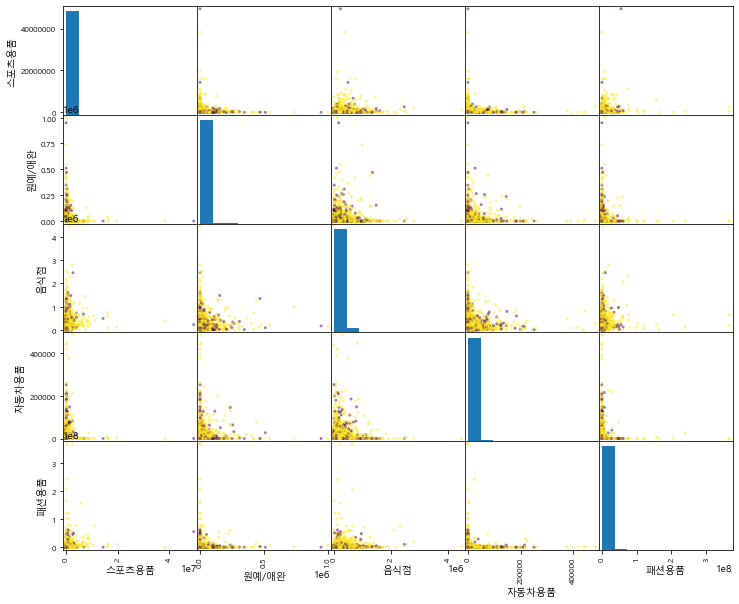

In [111]:
# 상품종류별 산포도
scatter_matrix(DFgr, figsize=(12, 10), c = DFgr['ages'], diagonal='hist')
plt.show()

## 소비 빈도/평균 소비 금액

RFM처럼 각 유통사별로 소비 빈도와 평균 소비 금액 특성 생성

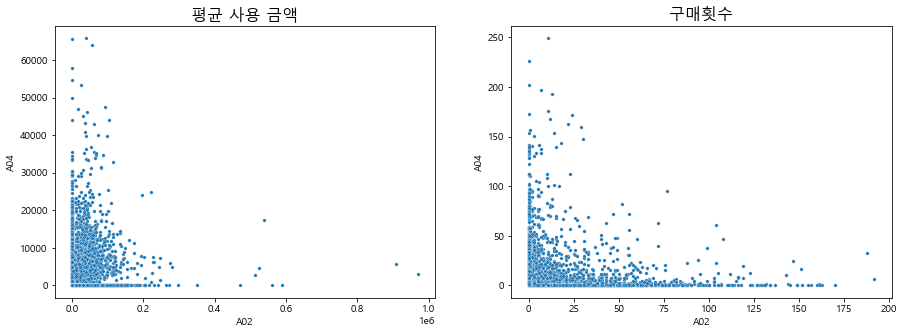

In [187]:
amount_food = (DF_foods.groupby(['cust', 'cop_c'])['buy_am'].sum()/DF_foods.groupby(['cust', 'cop_c'])['rct_no'].unique().apply(lambda x: len(x))).to_frame(name = 'amount_avg')
amount_food = amount_food.unstack()
amount_food.columns = [f'A0{i}' for i in range(1, 7)]
amount_food = amount_food.fillna(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

sns.scatterplot(data = amount_food, x = 'A02', y = 'A04', s = 12, ax = ax1)

cnt_food = DF_foods.groupby(['cust', 'cop_c'])['rct_no'].unique().apply(lambda x: len(x)).unstack()
cnt_food = cnt_food.fillna(0)
cnt_food = cnt_food[cnt_food['A04'] < 300] # 구매횟수가 300회 이상인 데이터 제거
sns.scatterplot(data = cnt_food, x = 'A02', y = 'A04', s = 12, ax = ax2)

ax1.set_title('평균 사용 금액', fontsize = 16)
ax2.set_title('구매횟수', fontsize = 16)
plt.show()

In [188]:
amount_food = pd.merge(amount_food, df_demo[['cust', 'ages']], left_index=True, right_on='cust')

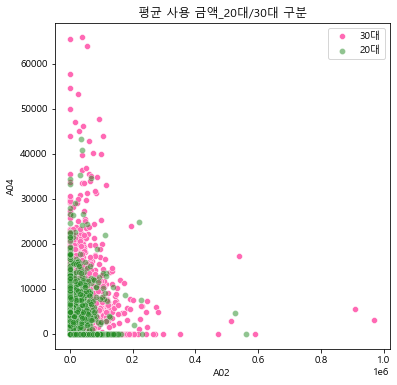

In [189]:
plt.figure(figsize=(6, 6))
colors = ['forestgreen', 'hotpink']
alpha = [0.5, 1]
for i in range(3, 1, -1):
    sns.scatterplot(data = amount_food[amount_food['ages'] == f'{i}0대'], x = 'A02', y = 'A04', c = colors[i-2:i-1], alpha= alpha[i-2], label = f'{i}0대')
plt.title('평균 사용 금액_20대/30대 구분')
plt.show()

- 연령별로 분포 차이가 있을까 해서 봤는데 딱히 없는 것 같음

In [190]:
amount_food.columns = [f'M_A0{i}' for i in range(1, 7)]+['cust', 'ages']
cnt_food.columns = [f'F_A0{i}' for i in range(1, 7)]
FM_food = pd.merge(amount_food, cnt_food, left_on='cust', right_index = True)

Text(0.5, 1.0, 'F/M 상관관계')

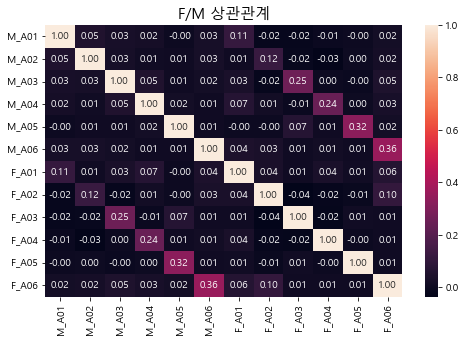

In [191]:
plt.figure(figsize=(8, 5))
sns.heatmap(FM_food.corr(), annot = True, fmt='.2f')
plt.title('F/M 상관관계', fontsize=15)

- 각 유통사 별로 F(빈도), M(금액) 관계가 있나 확인
- A05와 A06만 약한 상관이 있음
- 마트(A02), 슈퍼(A03), 편의점(A04)은 상관관계가 없으니 각각의 빈도, 금액 값을 군집화에 사용해도 될 것 같음

# 군집화

세 컬럼의 분포가 원형이 아니라서 밀도기반 군집화가 나을 것 같은데 k-means, DBSCAN 모두 사용해봄

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

In [37]:
def RunKM(df, n_clusters, columns):
    km = KMeans(n_clusters=n_clusters, random_state=1)
    km.fit(df[columns].values)
    df['clus'] = km.labels_

    score_samples = silhouette_samples(df[columns], df['clus'])
    df['sil_coef'] = score_samples

    return df[['clus']]

In [38]:
def Optimize(df, n_clusters_list):
    fig = plt.figure(figsize=(6*len(n_clusters_list), 16))
    ax = []

    columns = df.columns
    for i, n_clusters in enumerate(n_clusters_list):
        ax.extend([fig.add_subplot(2, len(n_clusters_list), i+1), fig.add_subplot(2, len(n_clusters_list), i+1+len(n_clusters_list), projection='3d')])
        RunKM(df_sc, n_clusters, columns)
        y_lower = 10

        for n in range(n_clusters):
            df_tmp = df[df['clus'] == n]
            sil_coef = df_tmp['sil_coef'].sort_values()
            clus_size = sil_coef.shape[0]
            y_upper = y_lower + clus_size

            ax[2*i].fill_betweenx(np.arange(y_lower, y_upper), 0, sil_coef)
            ax[2*i].text(-0.05, y_lower + 0.5 * clus_size, str(n))

            ax[2*i+1].scatter(df_tmp['F_A02'], df_tmp['F_A03'], df_tmp['F_A04'], label=n)

            y_lower = y_upper + 10
            del df_tmp

        avg_score = silhouette_score(df[columns], df['clus'])
        ax[2*i].axvline(x=avg_score, color="red", linestyle="--")
        ax[2*i].set_title('n_clusters : %d\nsilhouette score : %.3f' % (n_clusters, avg_score))

        ax[2*i+1].set_xlabel('F_A02', fontsize=20)
        ax[2*i+1].set_ylabel('F_A03', fontsize=20)
        ax[2*i+1].set_zlabel('F_A04', fontsize=20)
        ax[2*i+1].legend()

    plt.show()

In [192]:
X_sc = StandardScaler().fit_transform(FM_food[['F_A02', 'F_A03', 'F_A04']].values)
df_sc = pd.DataFrame(X_sc, columns = ['F_A02', 'F_A03', 'F_A04'])

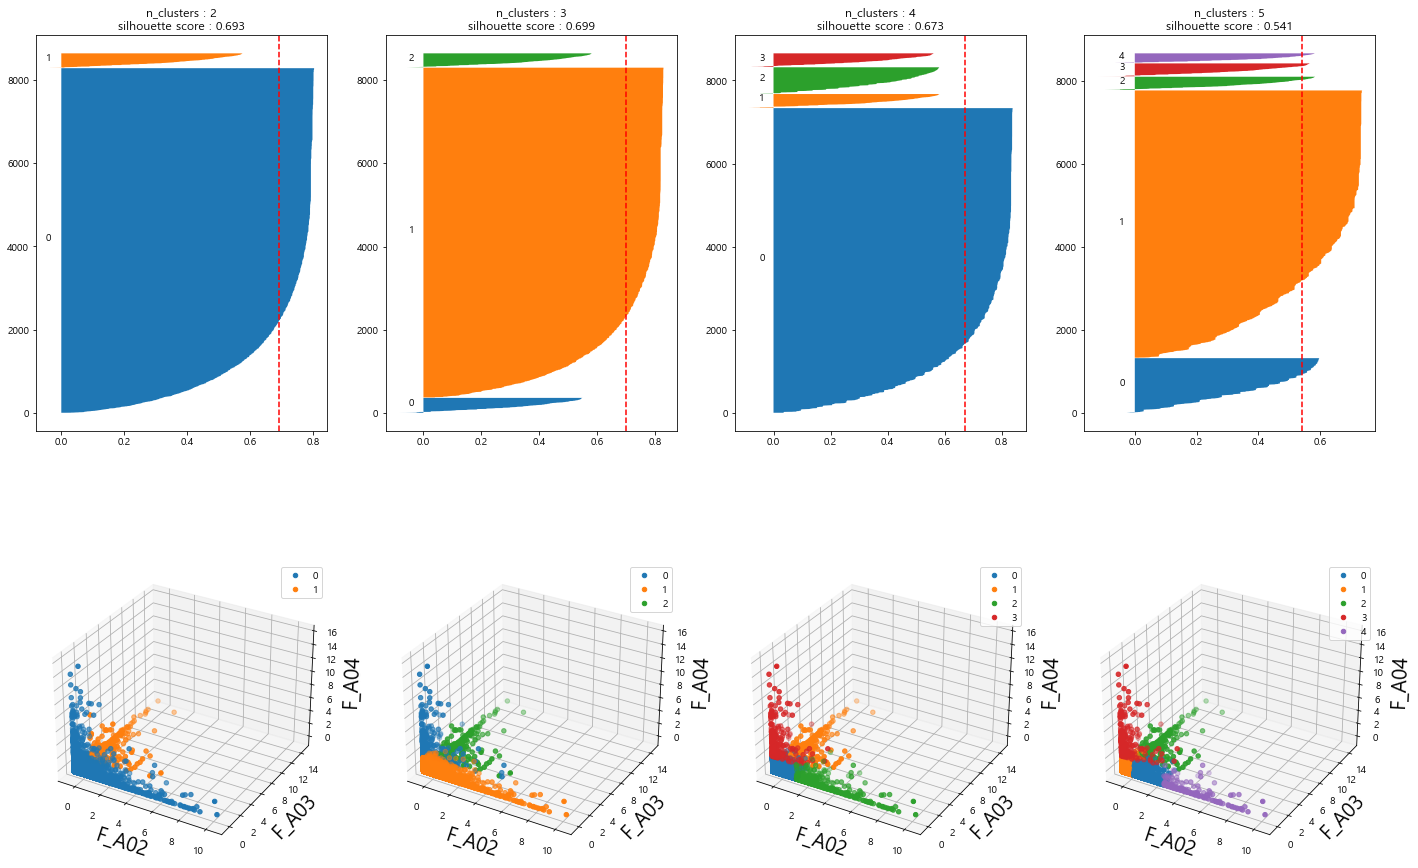

In [193]:
Optimize(df_sc, [i for i in range(2, 6)])

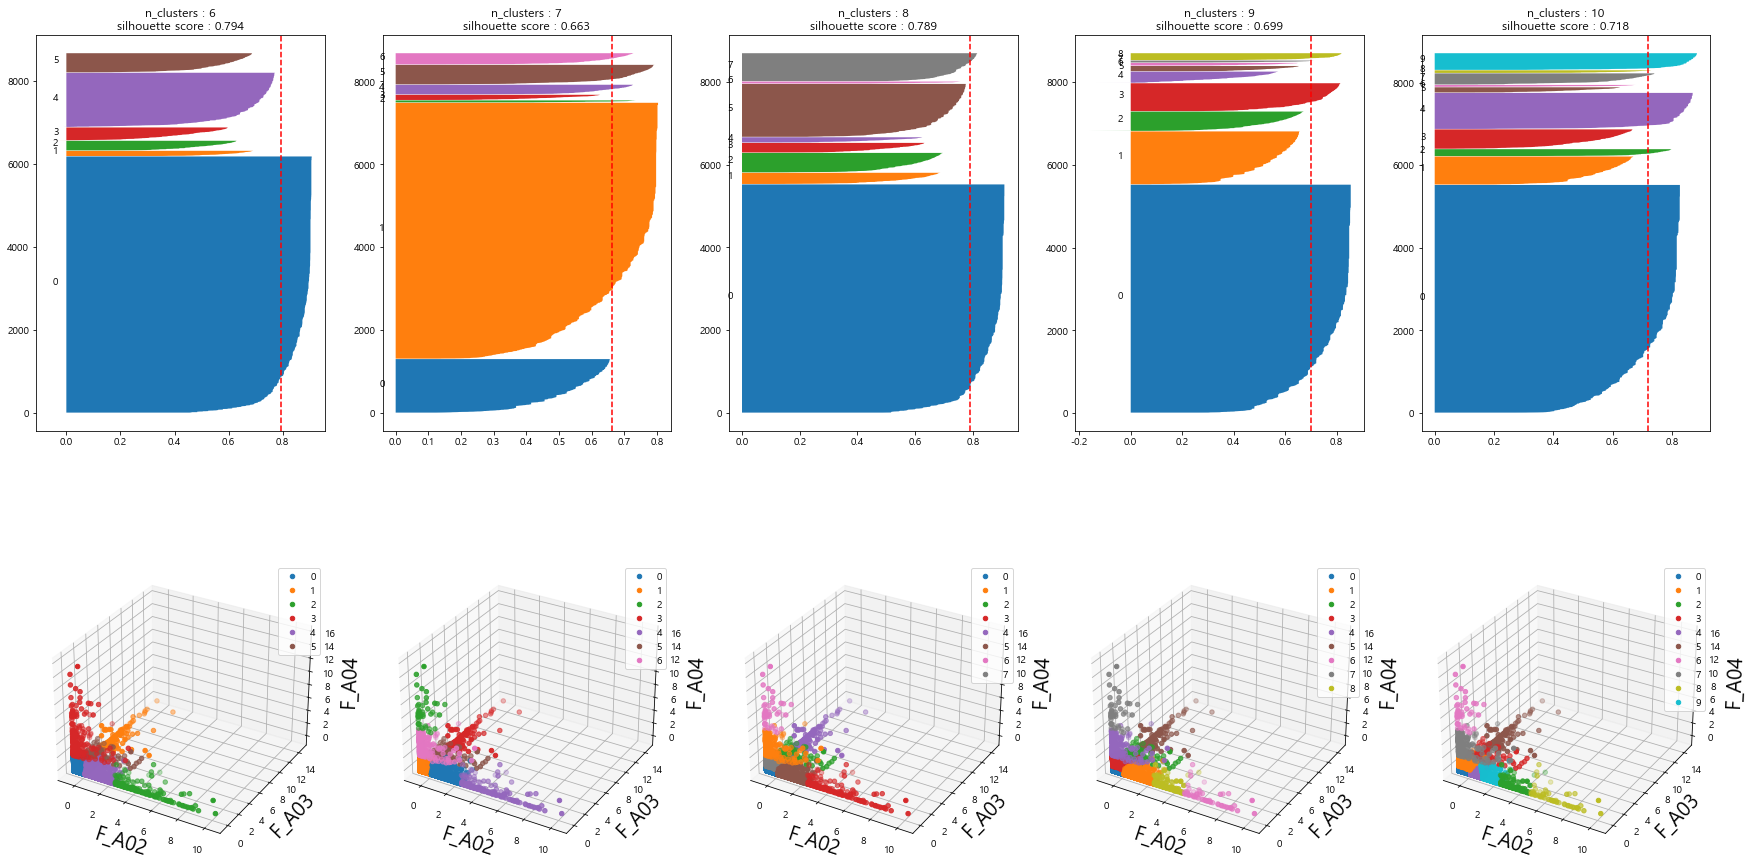

In [194]:
Optimize(df_sc, [i for i in range(6, 11)])

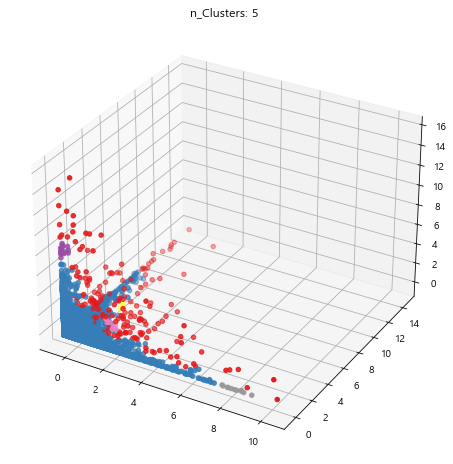

In [204]:
from sklearn.cluster import DBSCAN

X = df_sc.iloc[:, :-2].copy()
db = DBSCAN(eps = 0.4)
db.fit(X.values)
X['clus'] = db.labels_
n_clusters = len(X['clus'].unique())

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(X['F_A02'], X['F_A03'], X['F_A04'], s=20, c=X["clus"], marker='o', cmap = 'Set1')
ax.set_title(f'n_Clusters: {n_clusters -1}')
plt.show()

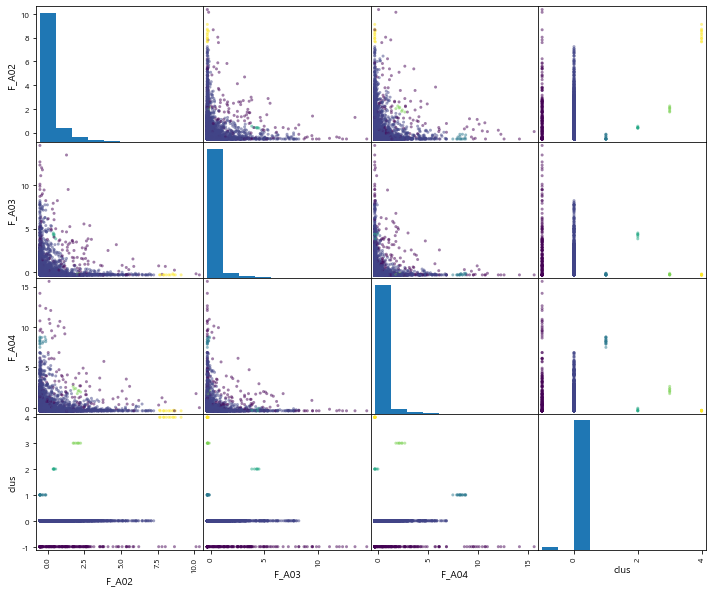

In [205]:
# DBSCAN 결과 분포 시각화
scatter_matrix(X, figsize=(12,10), c = X['clus'])
plt.show()